In [17]:
import pandas as pd

# read dataset
data = pd.read_csv("challenge.txt", sep='\t', header=None)

rows, cols = data.shape
print(f"Dimensions: {rows} rows × {cols} columns")

missing = data.isnull().sum().sum()

if missing > 0:
    print("There are missing values")
else:
    print("No missing values")

Dimensions: 1000 rows × 10 columns
No missing values


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(data)
print("Number of components to preserve 99% variance:", pca.n_components_)


pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(data)
print("Number of components to preserve 99% variance:", pca.n_components_)


Number of components to preserve 99% variance: 2
Number of components to preserve 99% variance: 3


Explained variance ratio: [0.7260413  0.26185646]
Total variance retained: 0.987897760061818


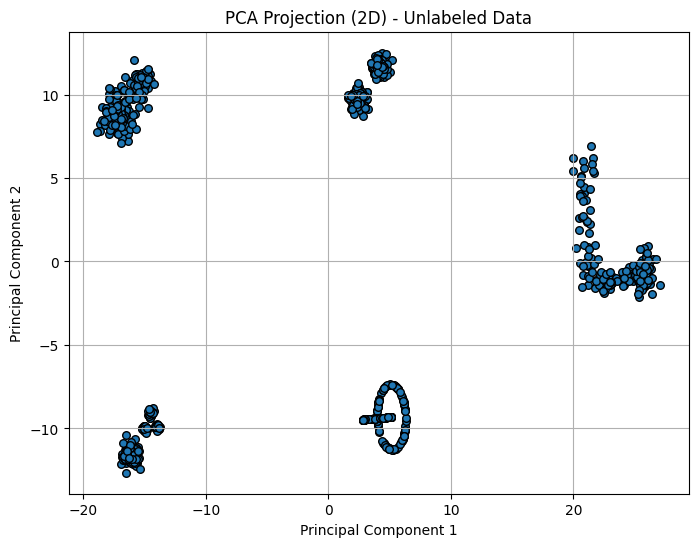

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.values)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30, edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D) - Unlabeled Data")
plt.grid(True)
plt.show()

Explained variance ratio: [0.7260413  0.26185646 0.00736647]
Total variance retained: 0.9952642306308093


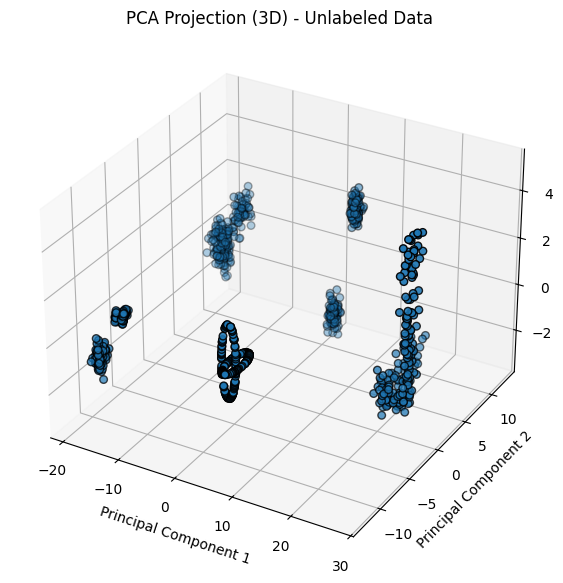

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_pca = pca.fit_transform(data.values)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=30, edgecolor='k')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Projection (3D) - Unlabeled Data')
plt.show()

In [24]:
summary = pd.DataFrame({
    'Mean': data.mean(),
    'Median': data.median(),
    'Std Dev': data.std()
})

print(summary)

           Mean     Median    Std Dev
0  9.600000e+00   7.299342   9.072724
1  1.600000e+01  19.141101  15.027236
2  7.105427e-17   0.161230   1.262376
3  7.105427e-17   0.000000   0.997996
4  5.684342e-17   0.000000   0.446317
5 -8.526513e-17   0.000000   0.446317
6 -2.842171e-17   0.000000   0.446317
7  4.973799e-17   0.000000   0.446317
8  7.105427e-17   0.000000   0.446317
9  3.552714e-17   0.000000   0.446317


In [32]:
correlation_matrix = data.corr().round(3)
print(correlation_matrix.round(3))

       0      1      2      3      4      5      6      7      8      9
0  1.000 -0.070  0.016  0.004  0.043  0.043  0.043  0.043  0.044  0.043
1 -0.070  1.000  0.055  0.033  0.025  0.027  0.025  0.026  0.026  0.026
2  0.016  0.055  1.000  0.532  0.305  0.310  0.301  0.305  0.305  0.306
3  0.004  0.033  0.532  1.000  0.391  0.400  0.387  0.390  0.386  0.391
4  0.043  0.025  0.305  0.391  1.000  0.871  0.859  0.875  0.858  0.856
5  0.043  0.027  0.310  0.400  0.871  1.000  0.868  0.867  0.867  0.876
6  0.043  0.025  0.301  0.387  0.859  0.868  1.000  0.871  0.875  0.851
7  0.043  0.026  0.305  0.390  0.875  0.867  0.871  1.000  0.863  0.862
8  0.044  0.026  0.305  0.386  0.858  0.867  0.875  0.863  1.000  0.861
9  0.043  0.026  0.306  0.391  0.856  0.876  0.851  0.862  0.861  1.000


In [37]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
most_correlated = corr_pairs.abs().sort_values(ascending=False)
top_pairs = most_correlated.drop_duplicates().reset_index()
print("Top correlated feature pairs:")
print(top_pairs)


Top correlated feature pairs:
    level_0  level_1      0
0         5        9  0.876
1         4        7  0.875
2         4        5  0.871
3         5        6  0.868
4         5        7  0.867
5         7        8  0.863
6         7        9  0.862
7         8        9  0.861
8         6        4  0.859
9         4        8  0.858
10        9        4  0.856
11        9        6  0.851
12        2        3  0.532
13        3        5  0.400
14        3        4  0.391
15        3        7  0.390
16        6        3  0.387
17        3        8  0.386
18        5        2  0.310
19        2        9  0.306
20        4        2  0.305
21        6        2  0.301
22        0        1  0.070
23        2        1  0.055
24        0        8  0.044
25        0        5  0.043
26        1        3  0.033
27        5        1  0.027
28        9        1  0.026
29        1        4  0.025
30        2        0  0.016
31        3        0  0.004


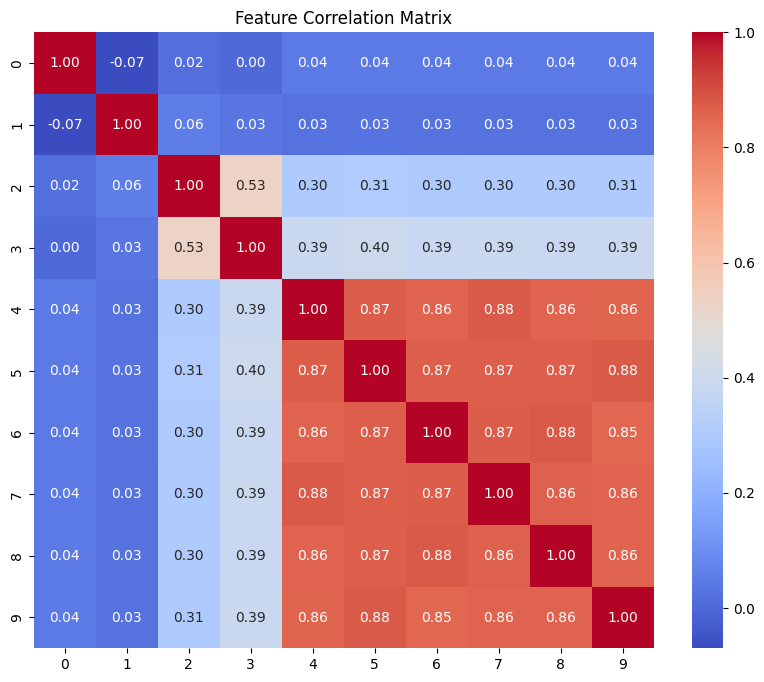

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()